In [1]:
from IPython.display import HTML, display

import torch
import numpy as np
import matplotlib.pyplot as plt

import settings
from find_similar import l1_loss, cosine_dist
from inference import Inference
from model import Autoencoder

In [2]:
np.random.seed(42)
model = Autoencoder(settings.BOARD_SHAPE, settings.LATENT_SIZE).to(settings.DEVICE)
model.load_state_dict(torch.load(settings.CODER_PATH, map_location=settings.DEVICE))
model.eval()

test = Inference(
    settings.DEVICE,
    model.coder,
)

In [3]:
empty_img = "img/60px_empty.png"
pieces_name = "img/60px-Chess_{}.png"
pieces_path = {
    "P": "plt",
    "B": "blt",
    "N": "nlt",
    "R": "rlt",
    "Q": "qlt",
    "K": "klt",
    "p": "pdt",
    "b": "bdt",
    "n": "ndt",
    "r": "rdt",
    "q": "qdt",
    "k": "kdt",
}
def display_fen(fen):
    fen = fen.split(' ')
    board_fen = fen[0]
    table = display_board(board_fen)
    player = fen[1]
    castling = fen[2].replace('K', '♔').replace('Q', '♕').replace('k', '♚').replace('q', '♛')
    return (table, castling, player)
    
def display_board(fen):
    table = ''
    for y, i in enumerate(fen.split("/")):
        table += '<tr>\n'
        x = 0
        for j in i:
            if j.isnumeric():
                img = '<img src="{}">'.format(empty_img)
                for k in range(int(j)):
                    table += '\t<td class="{}">{}</td>\n'.format('dark' if (x+y)%2 else 'light', img)
                    x += 1
            else:
                img = '<img src="{}">'.format(pieces_name.format(pieces_path[j]))
                table += '\t<td class="{}">{}</td>\n'.format('dark' if (x+y)%2 else 'light', img)
                x += 1
        table += '</tr>\n'
    return table

In [4]:
html = '''<!DOCTYPE html>
<html>
    <head>
        <title></title>
        <meta charset="UTF-8">
        <style>
            .chess-board { border-spacing: 0; border-collapse: collapse; margin-bottom: -1em; }
            .chess-board th { padding: .5em; }
            .chess-board td { border: 1px solid; width: 60px; height: 60px; }
            .chess-board .light { background: whitesmoke; }
            .chess-board .dark { background: sienna }
        </style>
    </head>
    <body>
        <table>
            <tbody>
                <tr>
                    <td style="text-align: center">
                        <h1> First: </h1>
                        <table class="chess-board">
                            <tbody>
                                %s
                            </tbody>
                        </table>
                        <h2 style="margin-bottom: 0em">castling: %s </h2>
                        <h2 style="margin-top: 0.5em">moves: %s</h2>
                    </td>
                    <td style="text-align: center">
                        <h1> Second: </h1>
                        <table class="chess-board">
                            <tbody>
                                %s
                            </tbody>
                        </table>
                        <h2 style="margin-bottom: 0em">castling: %s </h2>
                        <h2 style="margin-top: 0.5em">moves: %s</h2>
                    </td>
                </tr>
            </tbody>
        </table>
    </body>
</html>'''

# Test cases

### Template code - just in case
```py
fen_1 = ...
fen_2 = ...
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred_1, pred_2 = test.predict([fen_1, fen_2])
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))
```

In [5]:
def test_case(fen_1, fen_2):
    if len(fen_1.split(' ')) < 4:
        fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
    if len(fen_2.split(' ')) < 4:
        fen_2 += ' - 0 1'
    pred_1, pred_2 = test.predict([fen_1, fen_2])
    if torch.sqrt(pred_1.dot(pred_1)) > 10 or torch.sqrt(pred_2.dot(pred_2)) > 10:
        print(pred_1)
        print(pred_2)
    l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
    cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
    display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
    display(HTML(f'<h2>L1 loss: {l1}</h2>'))
    display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

In [6]:
test_case('rn1q1bnr/pp2pp2/8/6k1/8/7K/PPP1PP1P/RN1Q1B1R b -', 'rn1q1bnr/pp2pp2/6k1/8/8/7K/PPP1PP1P/RN1Q1B1R b -')

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [7]:
test_case('rnbqkbnr/pppp1ppp/4p3/8/8/4P3/PPPP1PPP/RNBQKBNR w KQkq', 'rnbqkbnr/pppp1ppp/4p3/8/8/4P3/PPPP1PPP/RNBQKBNR w -')

tensor([-123.9939,  135.1044,   49.5626,  -77.3206,  -21.5109,   79.3000,
         -79.3787,  180.7855,   80.8751,   35.3134,   84.2444,   55.6399,
           5.0651, -105.8057,   55.7235,    0.8912], grad_fn=<UnbindBackward>)
tensor([ 0.0732,  0.0319, -0.0454,  0.6591, -0.0616, -0.4864, -0.2674,  0.0581,
         0.1503,  0.4584,  0.3666, -0.1481,  0.7203,  0.2115,  0.4839, -0.0438],
       grad_fn=<UnbindBackward>)


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [8]:
test_case('rnbqkbnr/1ppp1pp1/p3p2p/8/8/P3P2P/1PPP1PP1/RNBQKBNR w KQkq', 'rnbqkbnr/1ppp1pp1/p3p2p/8/8/P3P2P/1PPP1PP1/RNBQKBNR w -')

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [9]:
test_case('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq', 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w -')

tensor([-636.9816,  890.7465,  509.5334, -289.4732, -115.6245,  417.3466,
        -322.0975, 1128.0548,  389.9212,  187.4043,  651.1213,  247.2832,
        -221.6020, -694.6794,  243.7807,   80.9596], grad_fn=<UnbindBackward>)
tensor([ 0.0079,  0.0226, -0.0971,  0.6486, -0.0693, -0.4860, -0.4776,  0.0709,
         0.1415,  0.4418,  0.3654, -0.3037,  0.7230,  0.0331,  0.4555, -0.0559],
       grad_fn=<UnbindBackward>)


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [10]:
test_case('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq', 'rnbqkbnr/pppppppp/8/8/8/5P2/PPPPP1PP/RNBQKBNR b KQkq')

tensor([-451.5692,  916.5300,  245.9551, -257.1716,  -82.9348,  267.5111,
        -252.7564,  719.4225,  464.5309,  313.4996,  356.8450,  179.4169,
         -66.5326, -592.1491,  123.3608,   46.6126], grad_fn=<UnbindBackward>)
tensor([-0.0119,  0.1816, -0.6082,  0.2655,  0.2156, -0.3893,  0.5419,  0.6400,
         0.0865, -0.0741,  0.4888,  0.5400,  0.7508, -0.0500, -0.8510,  0.2162],
       grad_fn=<UnbindBackward>)


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [11]:
test_case('rnbqkbnr/pp1ppppp/8/2p5/5P2/8/PPPPP1PP/RNBQKBNR w KQkq', 'rnbqkbnr/pppppppp/8/8/5P2/8/PPPPP1PP/RNBQKBNR b KQkq')

tensor([ -66.7349,  128.5219,   40.9232,  -61.4632,    3.2569,   53.9408,
         -82.4653,  178.2726,   54.3947,   61.1579,   78.8234,   53.7788,
          39.4182, -112.9482,   43.7437,   21.4798], grad_fn=<UnbindBackward>)
tensor([-0.1011,  0.3644, -0.6069,  0.2504,  0.2105, -0.3823,  0.4448,  0.5231,
         0.0880,  0.1330,  0.4640,  0.4494,  0.7393, -0.0765, -0.8455,  0.2094],
       grad_fn=<UnbindBackward>)


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [12]:
test_case('rnbqkb1r/pppp1ppp/7n/4p3/4P3/5Q2/PPPP1PPP/RNB1KBNR w KQkq', 'rnbqkb1r/pp1ppppp/5n2/2p5/2P5/1Q6/PP1PPPPP/RNB1KBNR w KQkq')

tensor([-19.6895,  25.6454,  26.0093, -17.2220, -10.7035,  15.4225, -19.8324,
         27.4815,  19.4239,  20.5095,  18.6027,  19.9566,  12.8866, -21.2575,
         18.8550,  -9.1046], grad_fn=<UnbindBackward>)
tensor([-6.0471,  6.4839,  6.1519, -5.3778, -3.8511,  4.3707, -5.1417,  6.6555,
         5.3420,  6.3497,  5.4950,  6.5558,  3.2594, -5.4654,  7.6679, -3.7532],
       grad_fn=<UnbindBackward>)


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [13]:
test_case('8/8/8/8/8/8/8/8 w -', '4k3/8/8/8/8/8/8/8 w -')

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


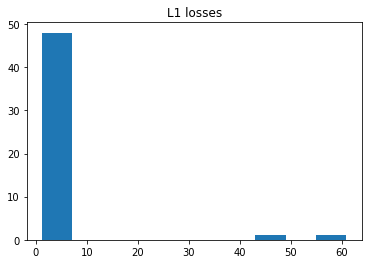

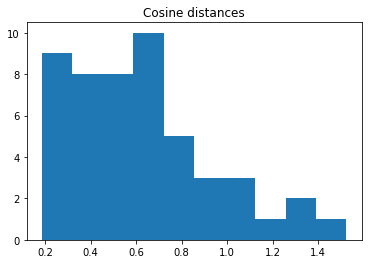

In [14]:
import io
import os
from random import sample, seed
seed(42)
import chess.pgn

from preprocessor import extract_games

path = os.path.join('test', 'example_games.pgn')

pgns = extract_games(path)
fens = set()
for pgn in pgns:
    board = chess.Board()
    for move in pgn:
        board.push_san(move)
        fens.add(board.fen())
    if len(fens) > 2000:
        break

fens = list(fens)
l1s = []
cos_ds = []
new_fens = []
for i in range(50):
    fen_1, fen_2 = sample(fens, k=2)
    pred = test.predict([fen_1, fen_2])
    pred_1, pred_2 = pred[0], pred[1]
    l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
    cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
    l1s.append(l1)
    cos_ds.append(cos_d)
    new_fens.append((fen_1, fen_2, l1, cos_d))
for fen_1, fen_2, l1, cos_d in sorted(new_fens, key=lambda t: t[3]):
    display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
    display(HTML(f'<h2>L1 loss: {l1}</h2>'))
    display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))
plt.hist(l1s)
plt.title('L1 losses')
plt.show()
plt.hist(cos_ds)
plt.title('Cosine distances')
plt.show()